# Binary Classification Deep Learning Model for [Project Name] Using Keras Version 3
### David Lowe
### November 1, 2019
Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. [https://machinelearningmastery.com/]

SUMMARY: [Sample Paragraph - The purpose of this project is to construct a predictive model using various machine learning algorithms and to document the end-to-end steps using a template. The Connectionist Bench dataset is a binary classification situation where we are trying to predict one of the two possible outcomes.]

INTRODUCTION: [Sample Paragraph - The data file patterns obtained by bouncing sonar signals off a metal cylinder or a rock at various angles and under various conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time.]

ANALYSIS: [Sample Paragraph - The baseline performance of the model achieved an average accuracy score of 80.12%. Using the same training parameters, the model processed the test dataset with an accuracy of 82.69%, which was even better than results from the training data.]

CONCLUSION: [Sample Paragraph - For this dataset, the model built using Keras and TensorFlow achieved a satisfactory result and should be considered for future modeling activities]

Dataset Used: [Connectionist Bench (Sonar, Mines vs. Rocks) Data Set]

Dataset ML Model: Binary classification with numerical attributes

Dataset Reference: [https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar,+Mines+vs.+Rocks%29]

One potential source of performance benchmarks: [https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/]

Any deep-learning modeling project genrally can be broken down into about six major tasks:
0. Prepare Environment
1. Load Data
2. Define Model
3. Fit and Evaluate Model
4. Optimize Model
5. Finalize Model

# Section 0. Prepare Environment

In [77]:
# Set the warning message filter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [78]:
# Create the random seed numbers for reproducible results
seedNum = 888

In [79]:
# Load libraries and packages
import random
random.seed(seedNum)
import numpy as np
np.random.seed(seedNum)
import tensorflow as tf
tf.random.set_seed(seedNum)
import keras as K
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import os
import sys
import shutil
import urllib.request
import zipfile
import smtplib
import matplotlib.pyplot as plt
from datetime import datetime
from email.message import EmailMessage
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

In [81]:
# Begin the timer for the script processing
startTimeScript = datetime.now()

# Set up the number of CPU cores available for multi-thread processing
n_jobs = 1

# Set up the flag to stop sending progress emails (setting to True will send status emails!)
notifyStatus = True

# Set the number of folds for cross validation
folds = 10

# Set the flag for splitting the dataset
splitDataset = True
splitPercentage = 0.25

# Set various default Keras modeling parameters
default_kernel_init = K.initializers.RandomNormal(seed=seedNum)
default_loss = 'binary_crossentropy'
default_optimizer = 'adam'
default_epochs = 100
default_batches = 5
default_metrics = ['accuracy']

In [82]:
# Set up the email notification function
def email_notify(msg_text):
    sender = os.environ.get('MAIL_SENDER')
    receiver = os.environ.get('MAIL_RECEIVER')
    gateway = os.environ.get('SMTP_GATEWAY')
    smtpuser = os.environ.get('SMTP_USERNAME')
    password = os.environ.get('SMTP_PASSWORD')
    if sender==None or receiver==None or gateway==None or smtpuser==None or password==None:
        sys.exit("Incomplete email setup info. Script Processing Aborted!!!")
    msg = EmailMessage()
    msg.set_content(msg_text)
    msg['Subject'] = 'Notification from Keras Binary Classification Script'
    msg['From'] = sender
    msg['To'] = receiver
    server = smtplib.SMTP(gateway, 587)
    server.starttls()
    server.login(smtpuser, password)
    server.send_message(msg)
    server.quit()

In [83]:
if (notifyStatus): email_notify("Phase 0 Prepare Environment completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 1. Load Data

In [84]:
if (notifyStatus): email_notify("Phase 1 Load Data has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

## 1.a) Load Dataset

In [85]:
dataset_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
dest_file = os.path.basename(dataset_path)
if (os.path.isfile(dest_file) == False) :
    print('Downloading ' + dataset_path + ' as ' + dest_file)
    with urllib.request.urlopen(dataset_path) as in_resp, open(dest_file, 'wb') as out_file:
        shutil.copyfileobj(in_resp, out_file)
    print(dest_file + 'downloaded!')
#     print('Unpacking ' + dest_file)
#     with zipfile.ZipFile(dest_file, 'r') as zip_ref:
#         zip_ref.extractall('.')
#     print(dest_file + 'unpacked!')

inputFile = dest_file
attrNames = ['attr' + str(i).zfill(2) for i in range(1,61)]
colNames = attrNames + ['target']
Xy_original = pd.read_csv(inputFile, names=colNames, sep=',', header=None, index_col=False)

# Take a peek at the dataframe after the import
Xy_original.head(10)

,attr01,attr02,attr03,attr04,attr05,attr06,attr07,attr08,attr09,attr10,...,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [86]:
Xy_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
attr01    208 non-null float64
attr02    208 non-null float64
attr03    208 non-null float64
attr04    208 non-null float64
attr05    208 non-null float64
attr06    208 non-null float64
attr07    208 non-null float64
attr08    208 non-null float64
attr09    208 non-null float64
attr10    208 non-null float64
attr11    208 non-null float64
attr12    208 non-null float64
attr13    208 non-null float64
attr14    208 non-null float64
attr15    208 non-null float64
attr16    208 non-null float64
attr17    208 non-null float64
attr18    208 non-null float64
attr19    208 non-null float64
attr20    208 non-null float64
attr21    208 non-null float64
attr22    208 non-null float64
attr23    208 non-null float64
attr24    208 non-null float64
attr25    208 non-null float64
attr26    208 non-null float64
attr27    208 non-null float64
attr28    208 non-null float64
attr29    208 non-null floa

In [87]:
Xy_original.describe()

,attr01,attr02,attr03,attr04,attr05,attr06,attr07,attr08,attr09,attr10,...,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [88]:
print(Xy_original.isnull().sum())
print('Total number of NaN in the dataframe: ', Xy_original.isnull().sum().sum())

attr01    0
attr02    0
attr03    0
attr04    0
attr05    0
         ..
attr57    0
attr58    0
attr59    0
attr60    0
target    0
Length: 61, dtype: int64
Total number of NaN in the dataframe:  0


## 1.b) Data Cleaning

In [89]:
# Standardize the class column to the name of targetVar if required
# Xy_original = Xy_original.rename(columns={'old_name': 'targetVar'})

# Dropping features
# Xy_original.drop(columns=['column1','column2','column3'], inplace=True)

# Impute missing values
# Xy_original['col_name'].fillna('someValue', inplace=True)
# Xy_original['col_name'].fillna(value=Xy_original['col_name'].median(), inplace=True)

# Convert columns from one data type to another
# Xy_original.column_name = Xy_original.column_name.astype('int')
# Xy_original.column_name = Xy_original.column_name.astype('category')

# Convert features with R/M levels into categorical feature of 0/1
def reClassSomecol(target):
    if (target == 'M'): return 1
    else: return 0
Xy_original['targetVar'] = Xy_original['target'].apply(reClassSomecol)
Xy_original.drop(columns=['target'], inplace=True)

# Take a peek at the dataframe after the cleaning
Xy_original.head(10)

,attr01,attr02,attr03,attr04,attr05,attr06,attr07,attr08,attr09,attr10,...,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,targetVar
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,0
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,0
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,0
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,0
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,0


In [90]:
Xy_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
attr01       208 non-null float64
attr02       208 non-null float64
attr03       208 non-null float64
attr04       208 non-null float64
attr05       208 non-null float64
attr06       208 non-null float64
attr07       208 non-null float64
attr08       208 non-null float64
attr09       208 non-null float64
attr10       208 non-null float64
attr11       208 non-null float64
attr12       208 non-null float64
attr13       208 non-null float64
attr14       208 non-null float64
attr15       208 non-null float64
attr16       208 non-null float64
attr17       208 non-null float64
attr18       208 non-null float64
attr19       208 non-null float64
attr20       208 non-null float64
attr21       208 non-null float64
attr22       208 non-null float64
attr23       208 non-null float64
attr24       208 non-null float64
attr25       208 non-null float64
attr26       208 non-null float64
attr27     

In [91]:
Xy_original.describe()

,attr01,attr02,attr03,attr04,attr05,attr06,attr07,attr08,attr09,attr10,...,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,targetVar
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [92]:
print(Xy_original.isnull().sum())
print('Total number of NaN in the dataframe: ', Xy_original.isnull().sum().sum())

attr01       0
attr02       0
attr03       0
attr04       0
attr05       0
            ..
attr57       0
attr58       0
attr59       0
attr60       0
targetVar    0
Length: 61, dtype: int64
Total number of NaN in the dataframe:  0


## 1.c) Feature Scaling and Pre-processing

In [93]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(Xy_original.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = totCol

In [94]:
# We create attribute-only and target-only datasets (X_original and y_original)
# for various visualization and cleaning/transformation operations

if targetCol == totCol:
    X_original = Xy_original.iloc[:,0:totAttr]
    y_original = Xy_original.iloc[:,totAttr]
else:
    X_original = Xy_original.iloc[:,1:totCol]
    y_original = Xy_original.iloc[:,0]

print("Xy_original.shape: {} X_original.shape: {} y_original.shape: {}".format(Xy_original.shape, X_original.shape, y_original.shape))

Xy_original.shape: (208, 61) X_original.shape: (208, 60) y_original.shape: (208,)


In [95]:
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 4
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to display the data visualization plots
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = dispCol*4
fig_size[1] = dispRow*4
plt.rcParams["figure.figsize"] = fig_size

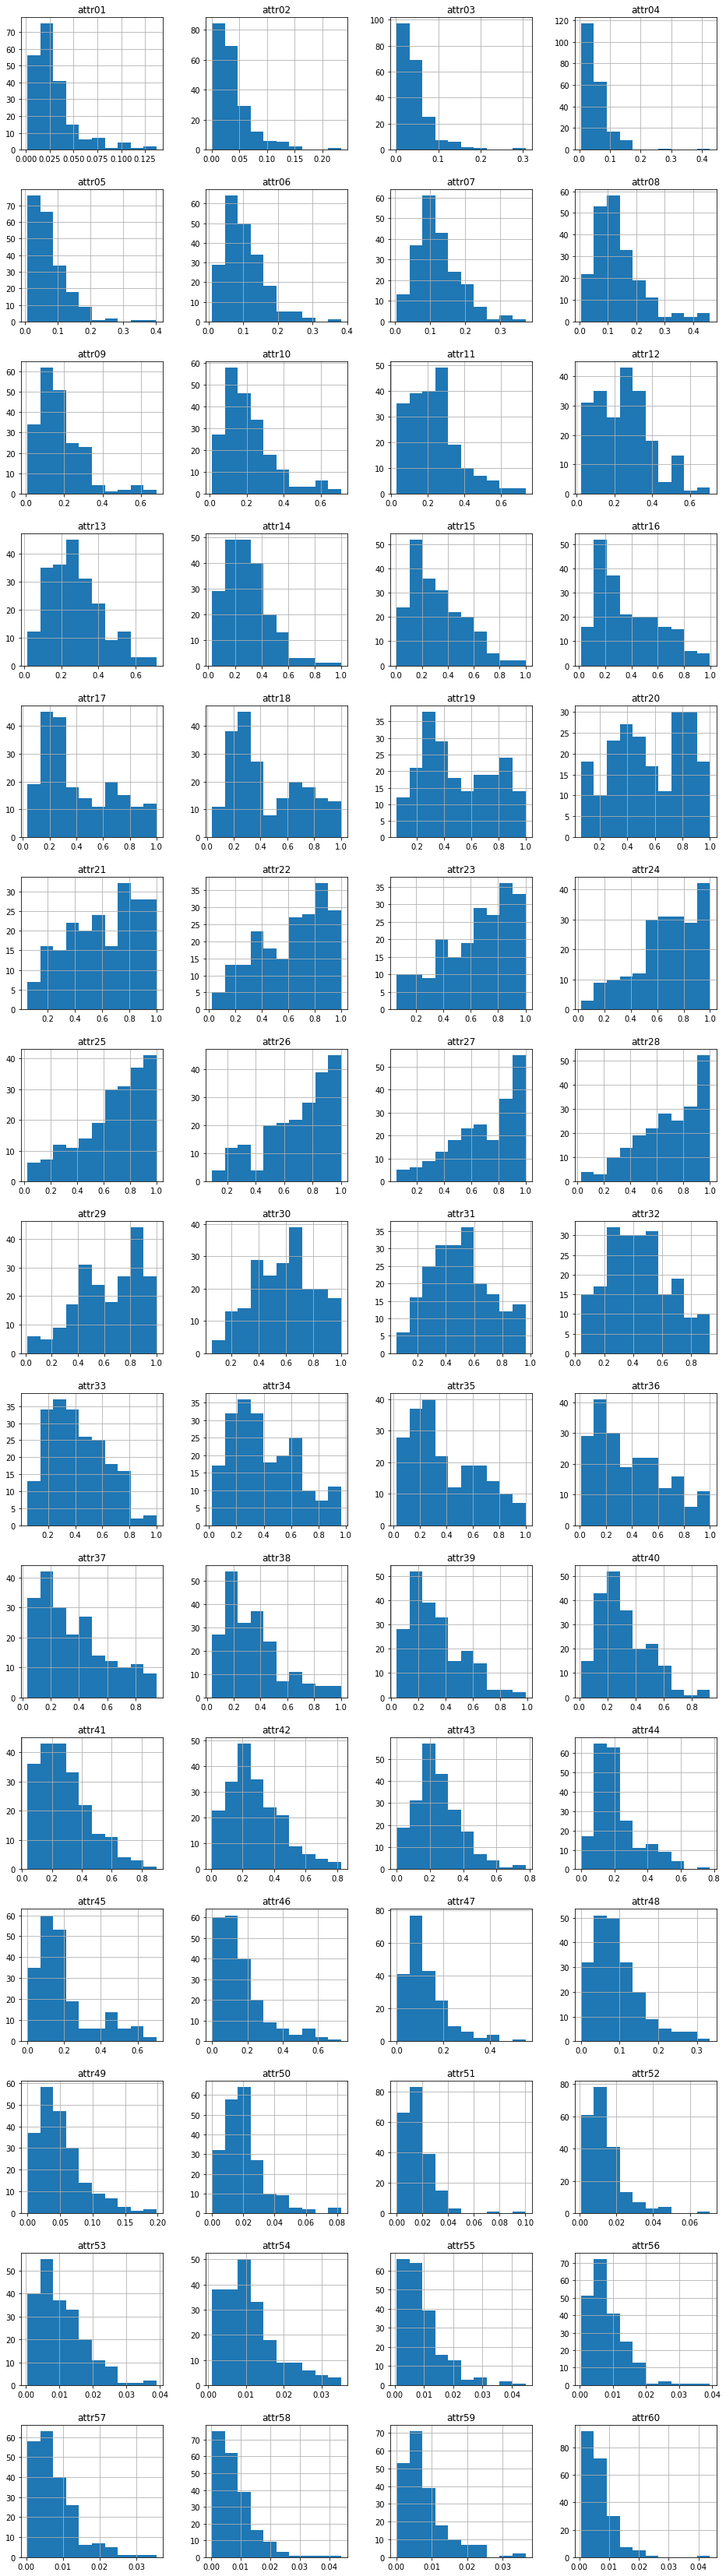

In [96]:
# Histograms for each attribute before pre-processing
X_original.hist(layout=(dispRow,dispCol))
plt.show()

In [97]:
# Apply feature scaling and transformation

X_colNames = list(X_original.columns)
X_original[X_colNames] = preprocessing.scale(X_original[X_colNames])
# X_original[X_colNames] = preprocessing.normalize(X_original[X_colNames])

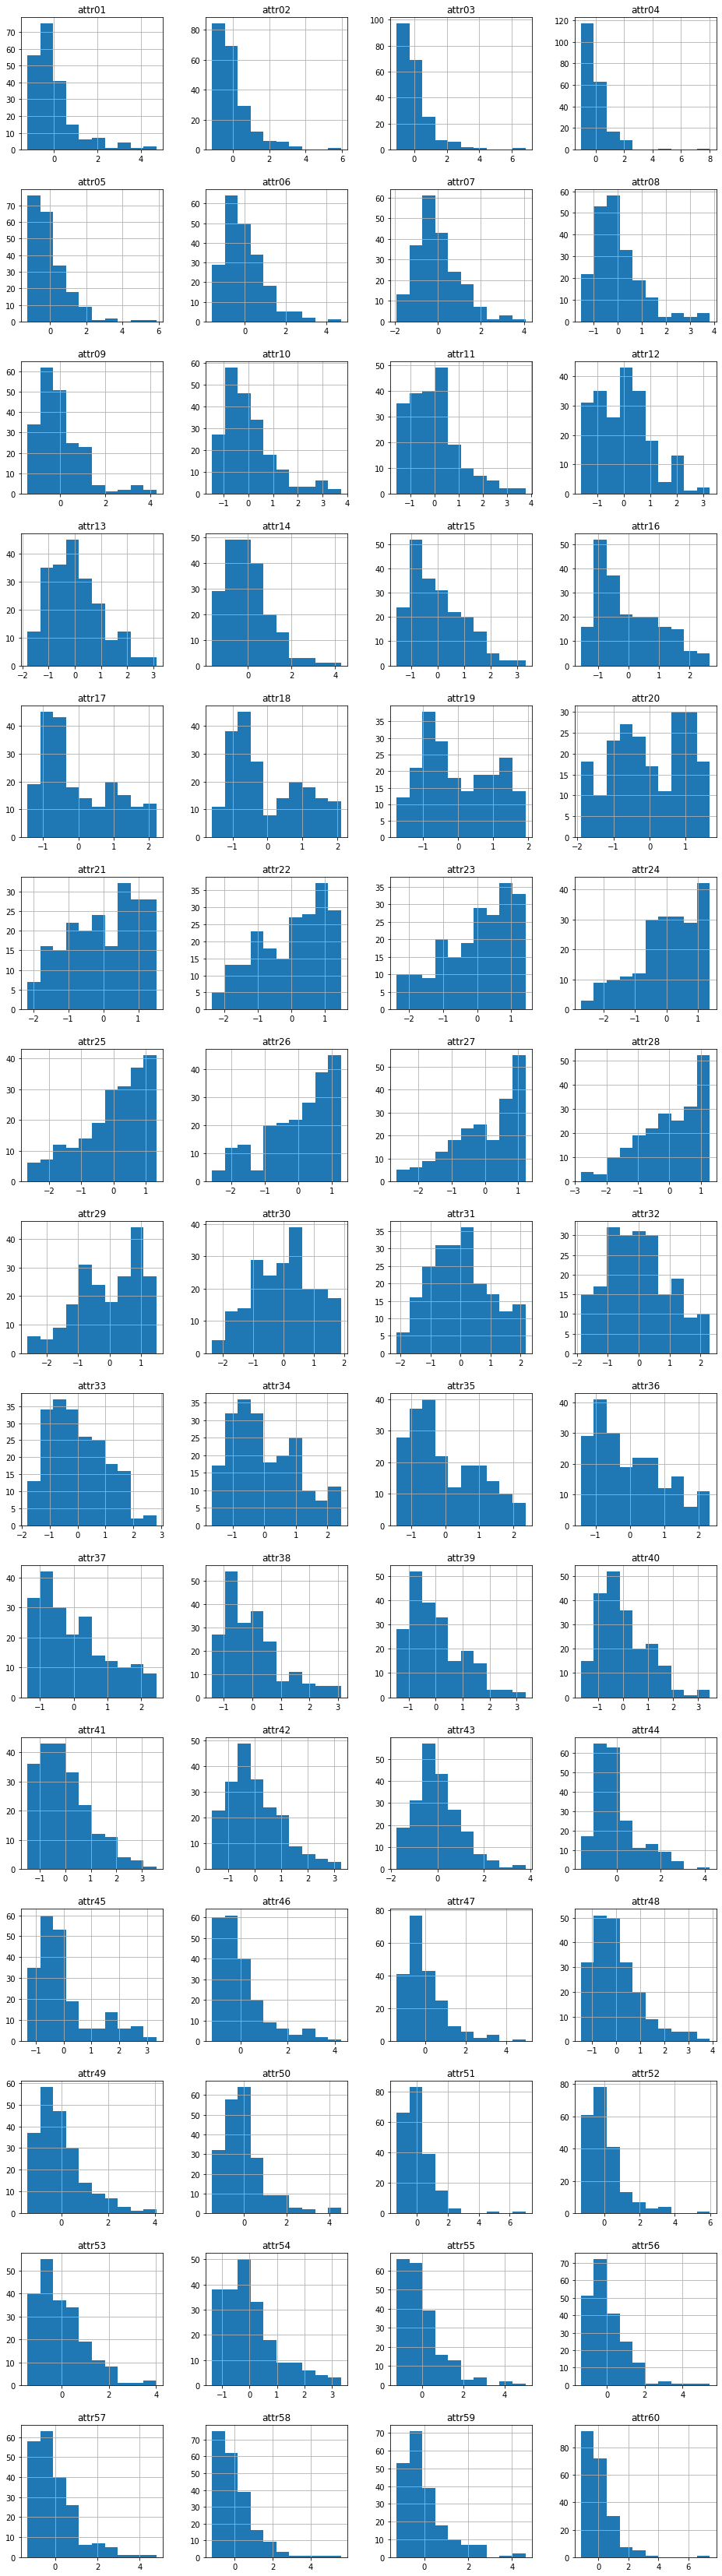

In [98]:
# Histograms for each attribute after pre-processing
X_original.hist(layout=(dispRow,dispCol))
plt.show()

## 1.d) Splitting Data into Training and Test Sets

In [99]:
# Encode class values as integers and perform one-hot-encoding
encoder = preprocessing.LabelEncoder()
encoder.fit(y_original)
y_encoded = encoder.transform(y_original)
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [101]:
# Split the data further into training and test datasets
X_encoded = X_original.values
if (splitDataset):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=splitPercentage, random_state=seedNum)
else:
    X_train, y_train = X_encoded, y_encoded
    X_test, y_test = X_encoded, y_encoded
print("X_train.shape: {} X_train.type: {}".format(X_train.shape, type(X_train)))
print("y_train.shape: {} y_train.type: {}".format(y_train.shape, type(y_train)))
print("X_test.shape: {} X_test.type: {}".format(X_test.shape, type(X_test)))
print("y_test.shape: {} y_test.type: {}".format(y_test.shape, type(y_test)))

X_train.shape: (156, 60) X_train.type: <class 'numpy.ndarray'>
y_train.shape: (156,) y_train.type: <class 'numpy.ndarray'>
X_test.shape: (52, 60) X_test.type: <class 'numpy.ndarray'>
y_test.shape: (52,) y_test.type: <class 'numpy.ndarray'>


In [ ]:
if (notifyStatus): email_notify("Phase 1 Load Data completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 2. Define Model

In [51]:
if (notifyStatus): email_notify("Phase 2 Define Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [52]:
# Define the Keras model required for KerasClassifier
def create_default_model():
    default_model = K.models.Sequential()
    default_model.add(Dense(60, input_dim=60, kernel_initializer=default_kernel_init, activation='relu'))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init, activation='sigmoid'))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

In [53]:
# Initialize the Keras model
cv_model = KerasClassifier(build_fn=create_default_model, epochs=default_epochs, batch_size=default_batches, verbose=0)

In [54]:
if (notifyStatus): email_notify("Phase 2 Define Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 3. Fit and Evaluate Model

In [55]:
if (notifyStatus): email_notify("Phase 3 Fit and Evaluate Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [56]:
# Fit and evaluate the Keras model using 10-fold cross validation
kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seedNum)
results = cross_val_score(cv_model, X_train, y_train, cv=kfold)
print('Generating results using the metrics of', default_metrics)
print('All cross-Validate results:', results)
print('Baseline results [mean (std)]: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))

Generating results using the metrics of ['accuracy']
All cross-Validate results: [0.6875     0.9375     1.         0.9375     0.875      0.75
 0.8125     0.73333335 1.         0.71428573]
Baseline results [mean (std)]: 84.48% (11.42%)


In [57]:
if (notifyStatus): email_notify("Phase 3 Fit and Evaluate Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 4. Optimize Model

In [58]:
if (notifyStatus): email_notify("Phase 4 Optimize Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [59]:
# Define the Keras model required for KerasClassifier
def create_customized_model(optimizer, kernel_init):
    customized_model = K.models.Sequential()
    customized_model.add(Dense(60, input_dim=60, kernel_initializer=kernel_init, activation='relu'))
    customized_model.add(Dense(1, kernel_initializer=kernel_init, activation='sigmoid'))
    customized_model.compile(loss=default_loss, optimizer=optimizer, metrics=default_metrics)
    return customized_model

In [62]:
# Create model
grid_model = KerasClassifier(build_fn=create_customized_model, verbose=0)

# Perform grid search using different epochs, batch sizes, and optimizers
optimizer_grid = ['adam', 'rmsprop']
init_grid = ['RandomNormal', 'glorot_normal', 'Orthogonal']
epoch_grid = [100, 150, 200]
batch_grid = [10, 15, 20]
param_grid = dict(optimizer=optimizer_grid, kernel_init=init_grid, epochs=epoch_grid, batch_size=batch_grid)
grid = GridSearchCV(estimator=grid_model, param_grid=param_grid, cv=folds, n_jobs=n_jobs)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.903846 using {'batch_size': 10, 'epochs': 200, 'kernel_init': 'glorot_normal', 'optimizer': 'adam'}
0.871795 (0.063003) with: {'batch_size': 10, 'epochs': 100, 'kernel_init': 'RandomNormal', 'optimizer': 'adam'}
0.878205 (0.065498) with: {'batch_size': 10, 'epochs': 100, 'kernel_init': 'RandomNormal', 'optimizer': 'rmsprop'}
0.865385 (0.076575) with: {'batch_size': 10, 'epochs': 100, 'kernel_init': 'glorot_normal', 'optimizer': 'adam'}
0.878205 (0.085644) with: {'batch_size': 10, 'epochs': 100, 'kernel_init': 'glorot_normal', 'optimizer': 'rmsprop'}
0.871795 (0.101223) with: {'batch_size': 10, 'epochs': 100, 'kernel_init': 'Orthogonal', 'optimizer': 'adam'}
0.884615 (0.077958) with: {'batch_size': 10, 'epochs': 100, 'kernel_init': 'Orthogonal', 'optimizer': 'rmsprop'}
0.884615 (0.061702) with: {'batch_size': 10, 'epochs': 150, 'kernel_init': 'RandomNormal', 'optimizer': 'adam'}
0.878205 (0.065498) with: {'batch_size': 10, 'epochs': 150, 'kernel_init': 'RandomNormal', 'optimizer

In [63]:
best_optimizer = grid_result.best_params_["optimizer"]
best_kernel_init = grid_result.best_params_["kernel_init"]
best_epoch = grid_result.best_params_["epochs"]
best_batch = grid_result.best_params_["batch_size"]

In [64]:
if (notifyStatus): email_notify("Phase 4 Optimize Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 5. Finalize Model

In [65]:
if (notifyStatus): email_notify("Phase 5 Finalize Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [66]:
# Create the final model for evaluating the test dataset
print('Forming the final model using: optimizer=%s, kernel=%s, epochs=%d, batch_size=%d'
      % (best_optimizer, best_kernel_init, best_epoch, best_batch))
final_model = create_customized_model(best_optimizer, best_kernel_init)
final_model.fit(X_train, y_train, epochs=best_epoch, batch_size=best_batch, verbose=1)

Forming the final model using: optimizer=adam, kernel=glorot_normal, epochs=200, batch_size=10
Epoch 1/200
156/156 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.6410
Epoch 2/200
156/156 [==============================] - 0s 211us/step - loss: 0.4954 - accuracy: 0.7564
Epoch 3/200
156/156 [==============================] - 0s 219us/step - loss: 0.4263 - accuracy: 0.8397
Epoch 4/200
156/156 [==============================] - 0s 214us/step - loss: 0.3774 - accuracy: 0.8397
Epoch 5/200
156/156 [==============================] - 0s 199us/step - loss: 0.3417 - accuracy: 0.8526
Epoch 6/200
156/156 [==============================] - 0s 200us/step - loss: 0.3109 - accuracy: 0.8910
Epoch 7/200
156/156 [==============================] - 0s 204us/step - loss: 0.2834 - accuracy: 0.9167
Epoch 8/200
156/156 [==============================] - 0s 220us/step - loss: 0.2585 - accuracy: 0.9359
Epoch 9/200
156/156 [==============================] - 0s 210us/step - loss: 0.2380

In [67]:
# Display a summary of the final model
print(final_model.summary())

Model: "sequential_552"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1103 (Dense)           (None, 60)                3660      
_________________________________________________________________
dense_1104 (Dense)           (None, 1)                 61        
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
# Evaluate the Keras model on previously unseen data
scores = final_model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (final_model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (final_model.metrics_names[0], scores[0]*100))

52/52 [==============================] - 0s 923us/step

accuracy: 80.77%

loss: 92.94%


In [106]:
# Make class predictions with the model
predictions = final_model.predict_classes(X_test)

# Summarize the first 20 cases
for i in range(20):
	print('Data item #%d predicted to be %d (expected %d)' % (i, predictions[i], y_test[i]))

<class 'numpy.ndarray'> <class 'list'>
Data item #0 predicted to be 0 (expected 0)
Data item #1 predicted to be 0 (expected 0)
Data item #2 predicted to be 0 (expected 0)
Data item #3 predicted to be 1 (expected 1)
Data item #4 predicted to be 0 (expected 0)
Data item #5 predicted to be 0 (expected 0)
Data item #6 predicted to be 0 (expected 0)
Data item #7 predicted to be 1 (expected 1)
Data item #8 predicted to be 1 (expected 1)
Data item #9 predicted to be 0 (expected 0)
Data item #10 predicted to be 0 (expected 0)
Data item #11 predicted to be 0 (expected 0)
Data item #12 predicted to be 0 (expected 1)
Data item #13 predicted to be 1 (expected 1)
Data item #14 predicted to be 0 (expected 0)
Data item #15 predicted to be 1 (expected 0)
Data item #16 predicted to be 0 (expected 0)
Data item #17 predicted to be 0 (expected 0)
Data item #18 predicted to be 0 (expected 0)
Data item #19 predicted to be 0 (expected 0)


In [ ]:
if (notifyStatus): email_notify("Phase 5 Finalize Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [ ]:
print ('Total time for the script:',(datetime.now() - startTimeScript))